In [1]:
# Importing our  tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Imporing the data
iris = pd.read_csv("Iris.csv", names = ['sepal_len', 'sepal_wid', 'petal_len', "petal_wid", 'class'] )

In [3]:
# Checking if data is uploaded correctly
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
## Detailed info of the data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# More infomation about the data
iris.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Number of rows and columns in the data 
iris.shape

(150, 5)

In [8]:
# Finding Data types
iris.dtypes

sepal_len    float64
sepal_wid    float64
petal_len    float64
petal_wid    float64
class         object
dtype: object

In [9]:
# Finding if there is missing data
iris.isna().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64

In [10]:
iris['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

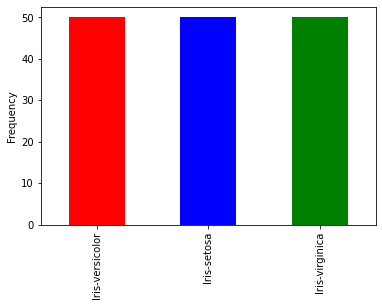

In [11]:
iris['class'].value_counts().plot(kind = 'bar', color = ['red', 'blue', 'green'], ylabel = 'Frequency');

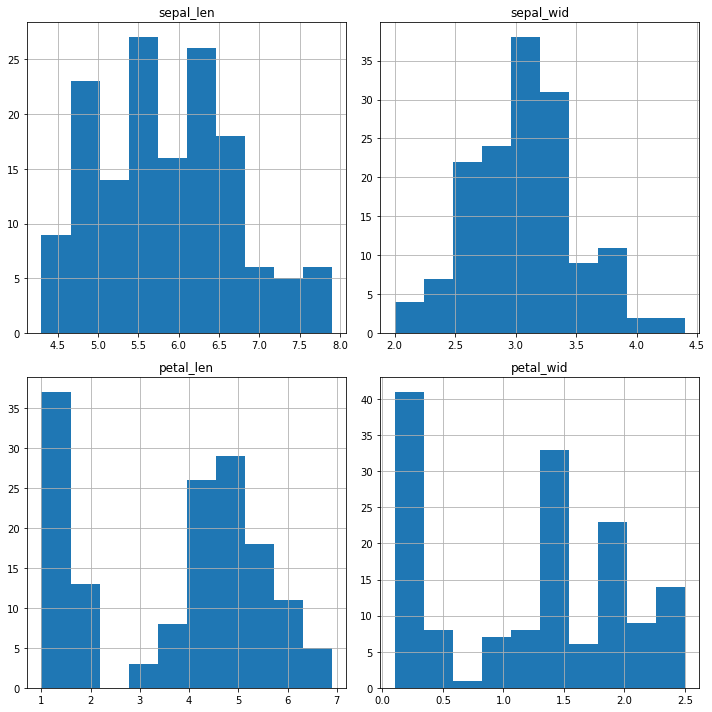

In [12]:
iris.hist(figsize = (10,10));
plt.tight_layout();


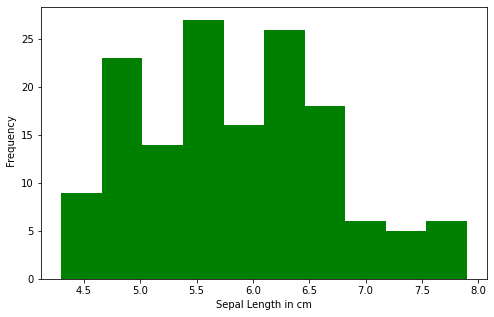

In [13]:
fig,ax = plt.subplots(figsize = (8,5))
ax.hist(iris['sepal_len'], color = 'g')
ax.set(xlabel = 'Sepal Length in cm', ylabel = ' Frequency');

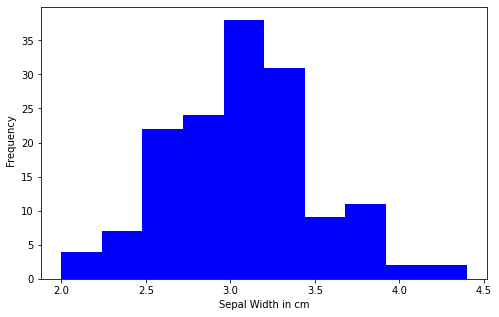

In [14]:
fig,ax = plt.subplots(figsize = (8,5))
ax.hist(iris['sepal_wid'], color = 'b')
ax.set(xlabel = 'Sepal Width in cm', ylabel = ' Frequency');

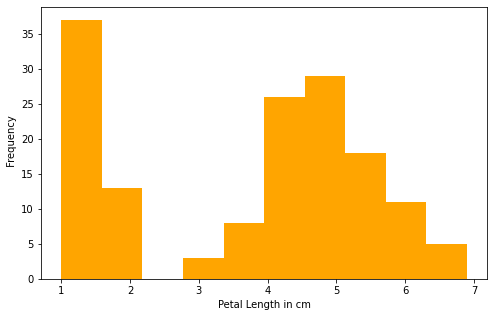

In [15]:
fig,ax = plt.subplots(figsize = (8,5))
ax.hist(iris['petal_len'], color = 'orange')
ax.set(xlabel = 'Petal Length in cm', ylabel = ' Frequency');

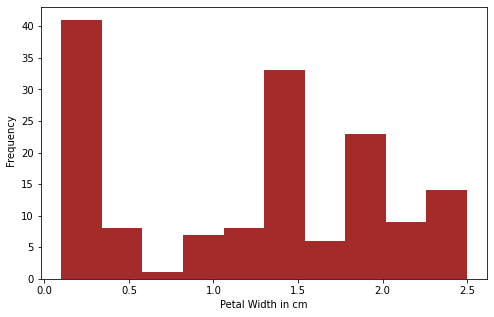

In [16]:
fig,ax = plt.subplots(figsize = (8,5))
ax.hist(iris['petal_wid'], color = 'brown')
ax.set(xlabel = 'Petal Width in cm', ylabel = ' Frequency');

In [17]:
iris.corr()

,sepal_len,sepal_wid,petal_len,petal_wid
sepal_len,1.000000,-0.109369,0.871754,0.817954
sepal_wid,-0.109369,1.000000,-0.420516,-0.356544
petal_len,0.871754,-0.420516,1.000000,0.962757
petal_wid,0.817954,-0.356544,0.962757,1.000000


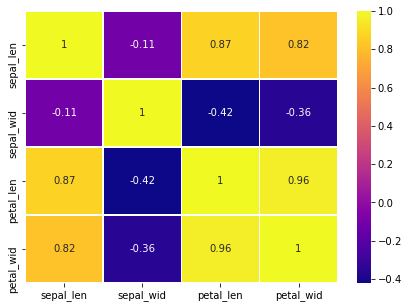

In [18]:
iris_correlation = iris.corr()
fig, ax = plt.subplots(figsize = (7,5))
ax = sns.heatmap(iris_correlation, annot = True, linewidth = 0.5, cmap = 'plasma');

In [19]:
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['class']= le.fit_transform(iris['class'])

In [21]:
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
X = iris.drop('class', axis = 1)
y = iris['class']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [24]:
len(X_train), len(X_test),len(y_train),len(y_test)

(120, 30, 120, 30)

I will be using different models to study our data:

1. Logistic Regression
2. SVM
3. KNeighbors
4. Naive Bayes
5. DecisionTreeClassifier
6. RandomForestClassifier
7. GradientBoostingClassifier

### 1. Using Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression


In [26]:
#### Using LogisticRegression on the data
X

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int32

In [28]:
lg = LogisticRegression()

In [29]:
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
lg.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_preds = lg.predict(X_test)

In [32]:
y_preds

array([0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0,
       2, 2, 0, 2, 2, 1, 1, 0])

In [33]:
lg.score(X_train,y_train)

0.975

In [34]:
lg.score(X_test, y_test)

1.0

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [36]:
print(confusion_matrix(y_test, y_preds))

[[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]


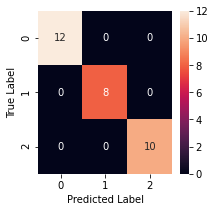

In [37]:
fig, ax = plt.subplots(figsize = (3,3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot = True)
ax.set(xlabel = 'Predicted Label', ylabel = 'True Label');


In [38]:
accuracy_score(y_test, y_preds)

1.0

###### Using cross_val_score

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
cross_val_score = cross_val_score(lg, X, y, cv=5);
#cross_val_score = np.mean(cross_val_score(lg, X, y, cv=5))


C:\Users\GurkirpalSingh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\GurkirpalSingh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [40]:
np.mean(cross_val_score)

0.9733333333333334

In [41]:
#### Using ROC/AUC
#from sklearn.metrics import roc_curve

In [42]:
# Make predictions with probabilities
#y_probs = lg.predict_proba(X_test)
#y_probs[:5], len(y_probs)

In [43]:
# y_probs_positive = y_probs[:,1]
# y_probs_positive

### 2. Using Support Vector machine model

In [44]:
from sklearn.svm import SVC

In [45]:
svc1 = SVC()

In [46]:
svc1.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [47]:
svc1.fit(X_train, y_train)

SVC()

In [48]:
svc1.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [49]:
y_preds= svc1.predict(X_test)

In [50]:
y_preds

array([0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0,
       2, 2, 0, 2, 2, 1, 1, 0])

In [51]:
svc1.score(X_train, y_train)

0.9583333333333334

In [52]:
svc1.score(X_test, y_test)

1.0

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [54]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [55]:
print(confusion_matrix(y_test, y_preds))

[[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]


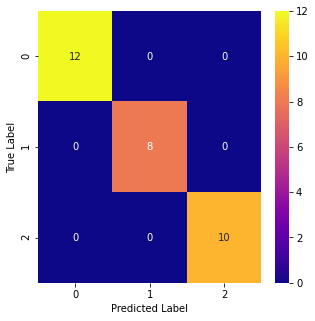

In [56]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, cmap = 'plasma')
ax.set(xlabel = 'Predicted Label', ylabel = 'True Label');


In [57]:
accuracy_score(y_test, y_preds)

1.0

#### Using Cross_val_score

In [58]:
from sklearn.model_selection import cross_val_score
cross_val_score(lg, X, y, cv=5)
#cross_val_score = np.mean(cross_val_score(lg, X, y, cv=5))
#cross_val_score;

C:\Users\GurkirpalSingh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\GurkirpalSingh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [59]:
cross_val_score = np.mean(cross_val_score(svc1, X,y, cv = 5))
cross_val_score

0.9666666666666666

### 3. Using K Neighbors Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knc = KNeighborsClassifier()

In [62]:
knc.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [63]:
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
y_preds = knc.predict(X_test)

In [65]:
y_preds

array([0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0,
       2, 2, 0, 2, 2, 1, 1, 0])

In [66]:
knc.score(X_train,y_train)

0.9666666666666667

In [67]:
knc.score(X_test, y_test)

1.0

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [70]:
print(confusion_matrix(y_test, y_preds))

[[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]


[Text(0.5, 24.0, 'Predicted Label'), Text(24.0, 0.5, 'True Label')]

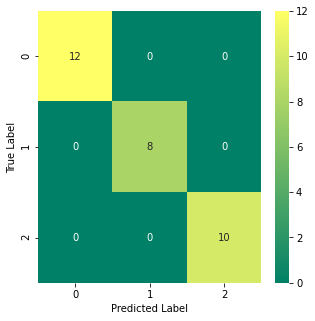

In [71]:
fig, ax = plt.subplots(figsize = (5,5))
ax  = sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, cmap = 'summer')
ax.set(xlabel = 'Predicted Label', ylabel = 'True Label')

In [72]:
accuracy_score(y_test, y_preds)

1.0

###### Using Cross_val_score

In [73]:
from sklearn.model_selection import cross_val_score
cross_val_score(knc, X, y, cv =5 )

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [74]:
cross_val_score = np.mean(cross_val_score(knc, X, y, cv =5 ))
cross_val_score

0.9733333333333334

### 4. Using Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
gnb = GaussianNB()

In [77]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [78]:
gnb.fit(X_train, y_train)

GaussianNB()

In [79]:
y_preds = gnb.predict(X_test)

In [80]:
y_preds

array([0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0,
       2, 2, 0, 2, 2, 1, 1, 0])

In [81]:
gnb.score(X_train, y_train)

0.9416666666666667

In [82]:
gnb.score(X_test, y_test)

1.0

In [83]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [84]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [85]:
print(confusion_matrix(y_test, y_preds))

[[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]


[Text(0.5, 24.0, 'Predicted Label'), Text(24.0, 0.5, 'True Label')]

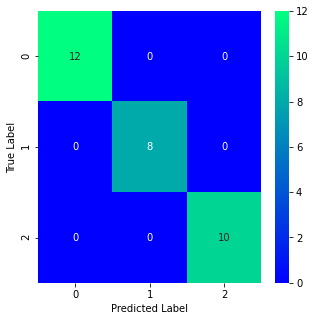

In [86]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_preds), cmap = 'winter', annot = True)
ax.set(xlabel = 'Predicted Label', ylabel = 'True Label')

In [87]:
accuracy_score(y_test, y_preds)

1.0

###### Using cross_val_score

In [88]:
from sklearn.model_selection import cross_val_score
cross_val_score(gnb, X, y, cv=5)

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [89]:
cross_val_score = np.mean(cross_val_score(gnb, X, y, cv=5))
cross_val_score

0.9533333333333334

### 5. Using Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [91]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [93]:
y_preds = dtc.predict(X_test)

In [94]:
y_preds

array([0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0,
       2, 2, 0, 2, 2, 1, 1, 0])

In [95]:
dtc.score(X_train, y_train)

1.0

In [96]:
dtc.score(X_test, y_test)

1.0

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [98]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [99]:
print(confusion_matrix(y_test, y_preds))

[[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]


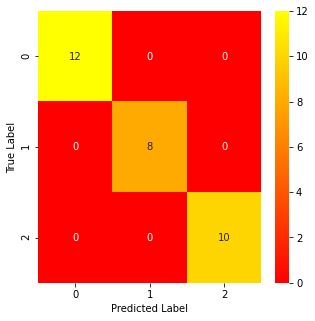

In [100]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, cmap = 'autumn')
ax.set(xlabel = 'Predicted Label', ylabel = 'True Label');

In [101]:
accuracy_score(y_test, y_preds)

1.0

#### Using cross_val_score

In [102]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtc, X, y, cv =5)
cross_val_score = np.mean(cross_val_score(dtc, X, y, cv=5))
cross_val_score

0.9533333333333334

### 6. Using Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rfc = RandomForestClassifier( n_estimators= 100)

In [105]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [106]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [107]:
y_preds = rfc.predict(X_test)

In [108]:
y_preds

array([0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0,
       2, 2, 0, 2, 2, 1, 1, 0])

In [109]:
rfc.score(X_train, y_train)

1.0

In [110]:
rfc.score(X_test, y_test)

1.0

In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [112]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [113]:
print(confusion_matrix(y_test, y_preds))

[[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]


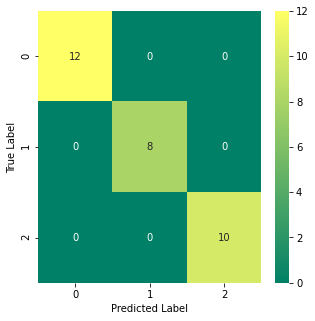

In [114]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, cmap = 'summer')
ax.set(xlabel = 'Predicted Label', ylabel = 'True Label');

In [115]:
accuracy_score(y_test, y_preds)

1.0

###### Using cross_val_score

In [116]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, X, y, cv =5)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [117]:
cross_val_score = np.mean(cross_val_score(rfc, X, y, cv =5))
cross_val_score

0.96

###### Hyperparameter tuning with RandomizedSearchCV

In [118]:
#def evaluate_preds(y_true, y_preds):
#    accuracy = accuracy_score(y_true, y_preds)
#    precision = precision_score(y_true, y_preds)
#    recall = recall_score(y_true, y_preds)
#    f1 = f1_score(y_true, y_preds)
#    metric_dict = {'accuracy': round(accuracy,2),
                   #'precision': round(precision,2),
                   #'recall': round(recall, 2),
                   # 'f1': round(f1, 2)}
#    print(f' Acc: {accuracy * 100:.2f}')
#    print(f' Precision: {precision:.2f}')
#    print(f' Recall: {recall * 100:.2f}')
#    print(f'F1 score: {f1:.2f}')
    
#    return metric_dict



In [119]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
        'max_depth' : [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split':[2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}

# Split into X and y
X = iris.drop('class', axis = 1)
y = iris['class']

# Split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RandomForestClassifier
rfc = RandomForestClassifier(n_jobs = 1)

# Setup RandomizedSearchCV
rs_rfc = RandomizedSearchCV(estimator = rfc,
                            param_distributions = grid,
                            n_iter = 10, # number of models to try
                            cv = 5, verbose = 2)

# Fit the RandomizedSearchCV
rs_rfc.fit(X_train, y_train);



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=

[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.0s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.2s finished


In [120]:
rs_rfc.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [121]:
# Make predictions with the best hyperparameters
#rs_rfc_preds = rs_rfc.predict(X_test)
    
#Evaluate the predictions
#rs_metrics = evaluate_preds(y_test, rs_rfc_preds)



In [122]:
rs_rfc.score(X_test, y_test)

1.0

### 7. Using Gradient Boosting Classifier

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

In [124]:
gbc = GradientBoostingClassifier(max_depth =30)

In [125]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=30)

In [126]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 30,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [127]:
y_preds = gbc.predict(X_test)

In [128]:
y_preds

array([1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 1, 1, 2])

In [129]:
gbc.score(X_train, y_train)

1.0

In [130]:
gbc. score(X_test, y_test)

1.0

In [131]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [132]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [133]:
print(confusion_matrix(y_test, y_preds))

[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


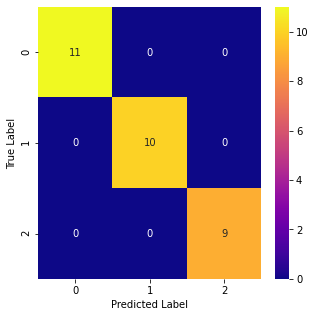

In [134]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, cmap = 'plasma')
ax.set(xlabel = 'Predicted Label', ylabel = 'True Label');

In [135]:
accuracy_score(y_test, y_preds)

1.0

###### Using cross_val_score

In [136]:
from sklearn.model_selection import cross_val_score
cross_val_score(gbc, X, y, cv =5)


array([0.96666667, 0.96666667, 0.86666667, 1.        , 1.        ])

In [137]:
cross_val_score = np.mean(cross_val_score(gbc, X, y, cv =5))
cross_val_score

0.96